In [127]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [146]:
crop_amount = 55

def with_png(filename):
    return filename + '.png'

def crop_img(filename):
    im = Image.open(with_png(filename))
    width, height = im.size
    im1 = im.crop((crop_amount, crop_amount, width-crop_amount, height-crop_amount))
    filename = filename+'cropped'
    im1.save(with_png(filename))
    return filename

def green(img):
    shape = np.shape(img)
    return np.count_nonzero(y_pred==255)/(shape[0]*shape[1])

In [248]:

# Load image and convert to HSV
def one_img(filename,min_hue = 35,max_hue = 110,sat_min = 0.1):
    filename = crop_img(filename)
    im = Image.open(with_png(filename)).convert('HSV')
    # Extract Hue channel and make Numpy array for fast processing
    Hue = np.array(im.getchannel('H'))
    rgb = Image.open(with_png(filename)).convert('RGB')
    a = np.asarray(rgb, int)
    m = np.min(a,2).T
    M = np.max(a,2).T
    C = M - m
    Cmsk = C != 0
    V = M
    #print(a.T.shape)
    S = np.zeros_like(Hue, float).T
    S[Cmsk] = ((C[Cmsk]) / V[Cmsk])
    # Make mask of zeroes in which we will set greens to 1
    hue_mask = np.zeros_like(Hue, dtype=np.uint8) 
    #sat_mask = np.zeros_like(Sat, dtype=np.uint8) 
    #print(sat_mask)
    # Set all green pixels to 1

    hue_mask[(Hue>min_hue) & (Hue<max_hue)] = 255
    
    
    huesat_mask = np.zeros_like(Hue, dtype=np.uint8) 
    #sat_mask = np.zeros_like(Sat, dtype=np.uint8) 
    #print(sat_mask)
    # Set all green pixels to 1
    
    huesat_mask[(Hue>min_hue) & (Hue<max_hue) & (S.T > sat_min)] = 255
    figwidth, figheight = plt.rcParams["figure.figsize"]
    fig, axes = plt.subplots(1, 3, figsize=(2 * figwidth, 1*figheight))
    #with rio.open(with_png(filename)) as src:
    #    plot.show(src, ax=axes[0])
    axes[0].imshow(im)
    axes[1].imshow(hue_mask)
    axes[2].imshow(huesat_mask)
    return green(huesat_mask)
    
def graph_it_all(filename,size,min_hue = 35,max_hue = 110,sat_min = 0.1):
    arr = []
    for x in range(size):
        arr.append(one_img("screenshot_" + str(x),min_hue,max_hue,sat_min))
    return arr

[0.08931904550886946, 0.42828111921291634, 0.6198798605236183, 0.12325262861056278, 0.3118143119955955]
[0.06879820238398976, 0.3903078238372119, 0.590055369795933, 0.09116097526039918, 0.2819405837775898]


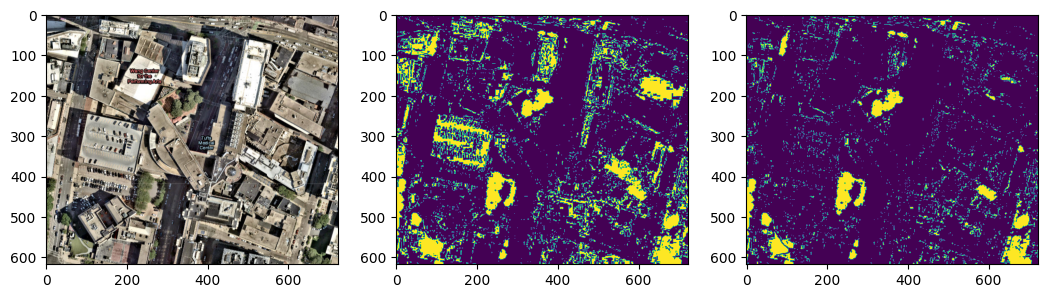

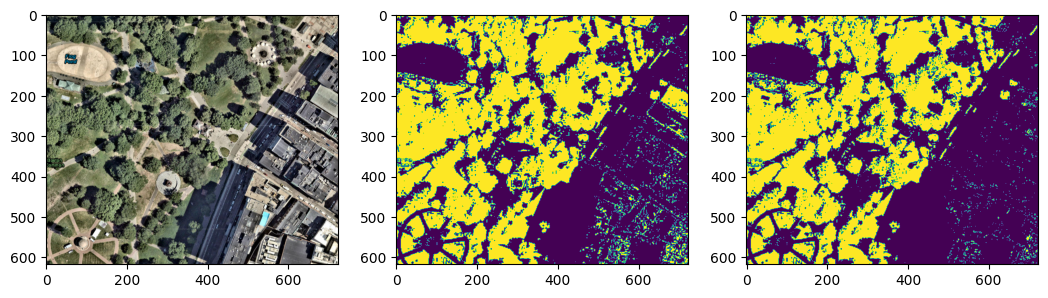

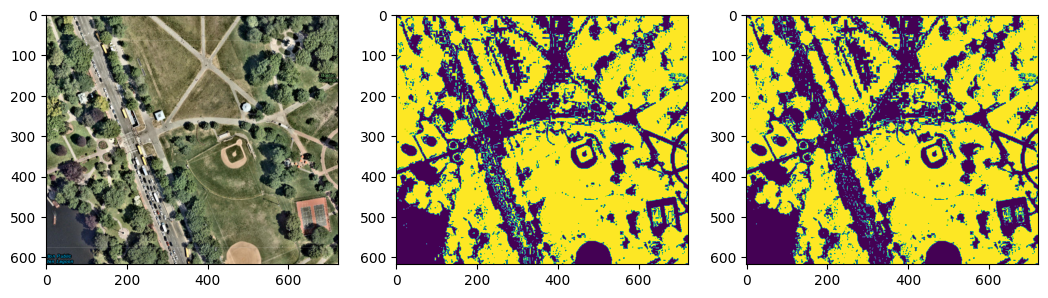

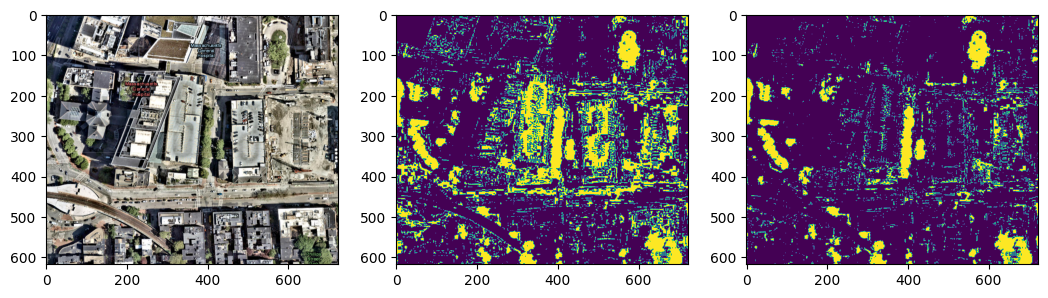

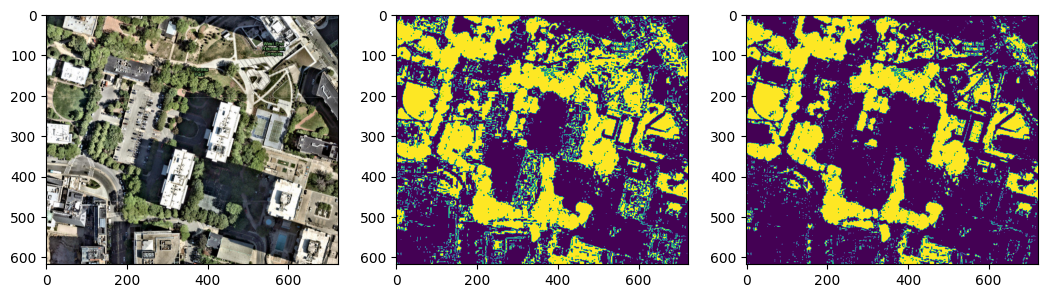

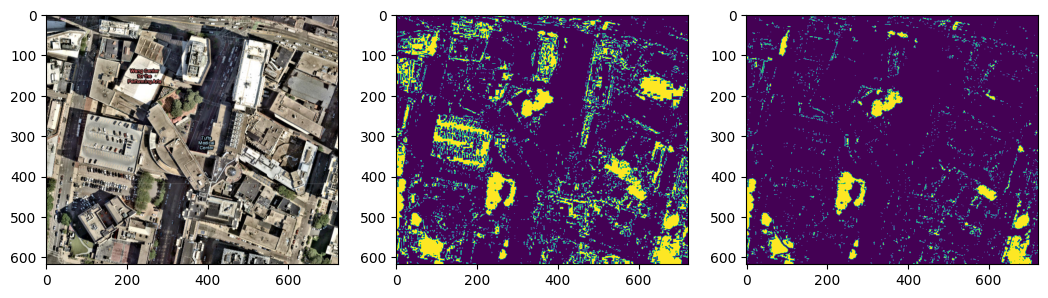

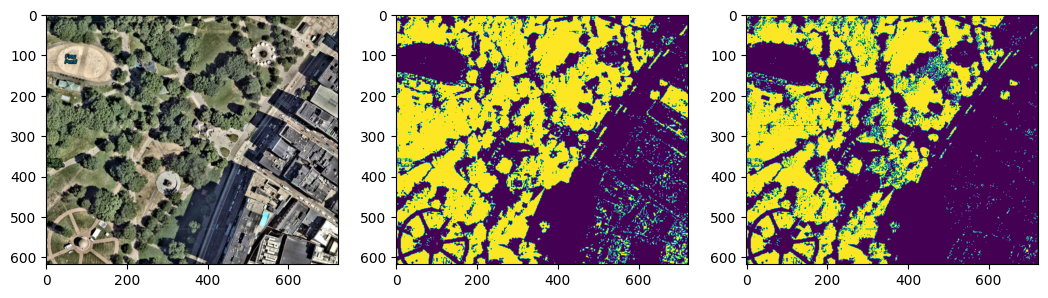

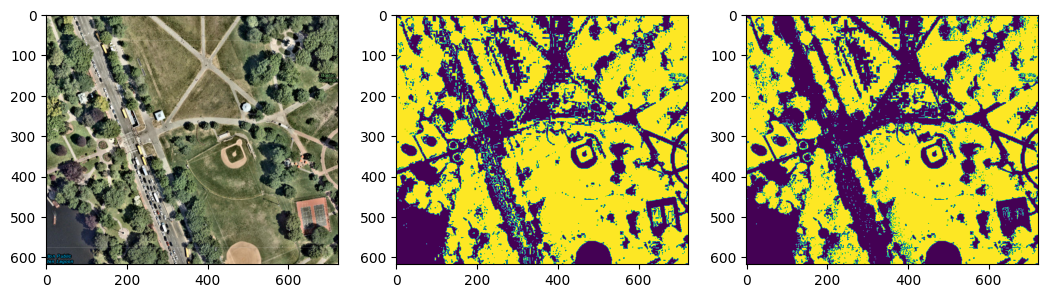

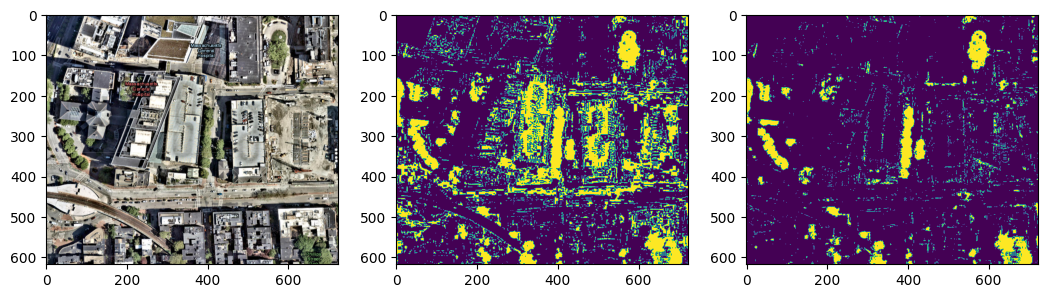

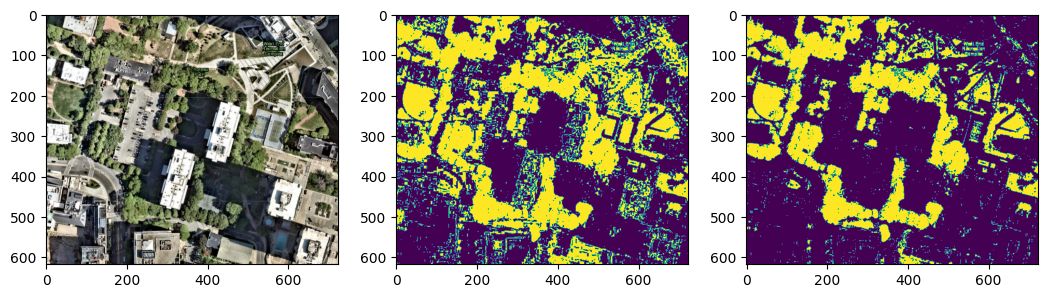

In [250]:
test1 = graph_it_all("screenshot_",size=5,min_hue=35,max_hue=110,sat_min=0.1)
test2 = graph_it_all("screenshot_",size=5,min_hue=35,max_hue=110,sat_min=0.15)
print(test1)
print(test2)

[0.5034354339837158, 0.6262896865362321, 0.8387405049976052, 0.4920324788390695, 0.6414839284355459]


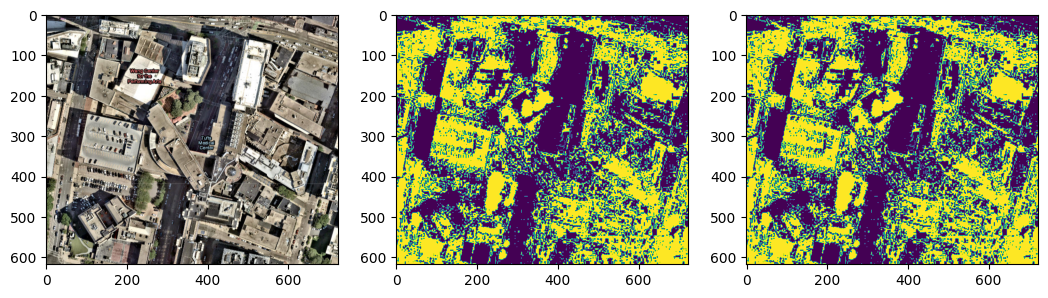

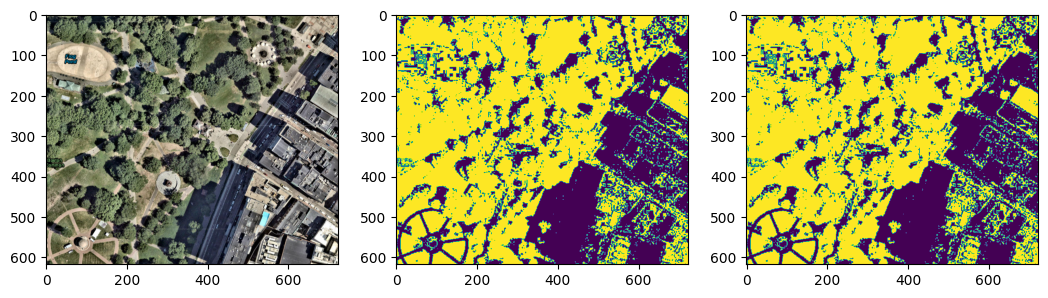

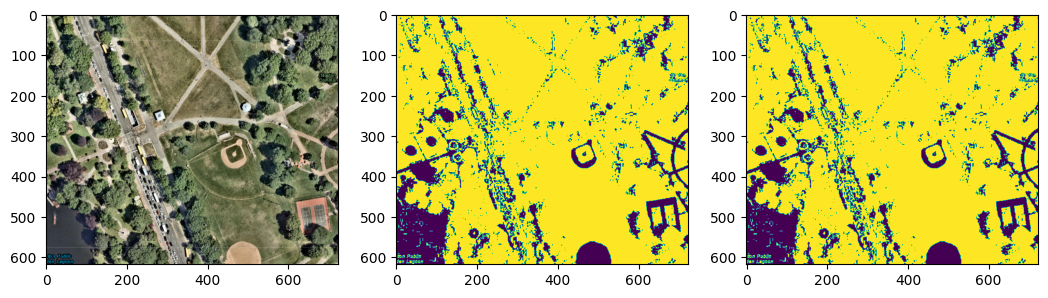

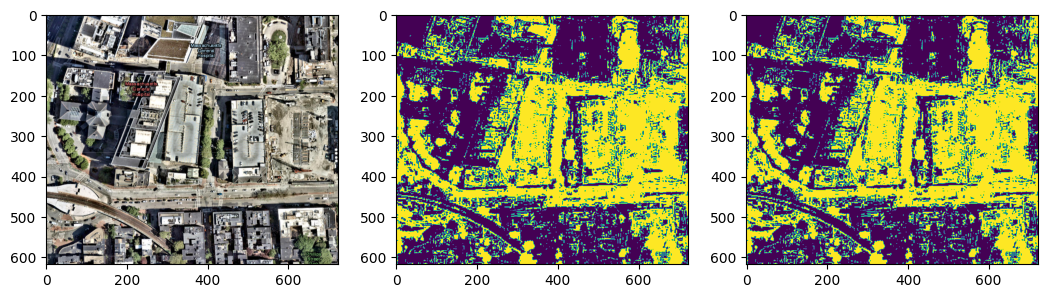

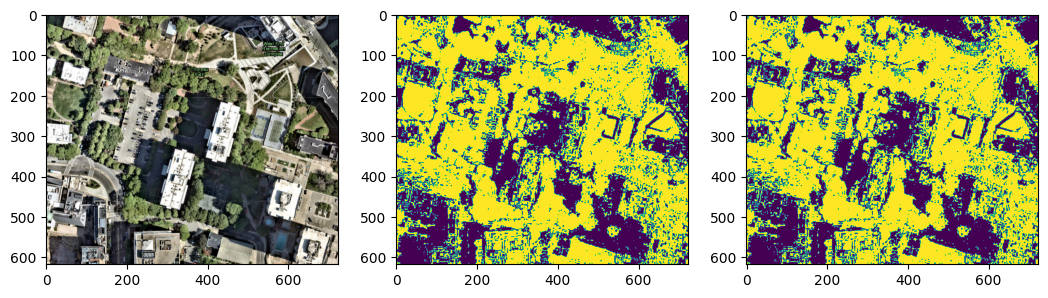

In [255]:
test1 = graph_it_all("screenshot_",size=5,min_hue=25,max_hue=140,sat_min=0)

print(test1)